# Primero Explorations
Using Magasin to explore the Primero API and datasets

In [3]:
import pandas as pd 
import requests



In [12]:
!pip install primero-api


Obtaining file:///Users/jmerlostevar/src/magasin/primero/primero_api
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build editable did not run successfully.
  │ exit code: 1
  ╰─> [27 lines of output]
      Traceback (most recent call last):
        File "/Users/jmerlostevar/Library/Caches/pypoetry/virtualenvs/dxint-hpo8hiaR-py3.12/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 353, in <module>
          main()
        File "/Users/jmerlostevar/Library/Caches/pypoetry/virtualenvs/dxint-hpo8hiaR-py3.12/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/Users/jmerlostevar/Library/

In [13]:
!pip show primero_api

In [11]:
import sys
sys.path.append('../primero_api/')
import primero_api


PRIMERO_USER='primero'
PRIMERO_PASSWORD='primer0!'
PRIMERO_SERVER_URL = 'http://localhost/'
PRIMERO_SERVER_API_URL='http://localhost/api/v2/'


primero = primero_api.PrimeroAPI(PRIMERO_USER, PRIMERO_PASSWORD, PRIMERO_SERVER_API_URL)

## Note that PrimeroAPI caches the information and controls the speed. rate / duration (sec) is the number of api calls per sec 
## cache_expire= number of seconds.
## primero = primero_api.PrimeroAPI(PRIMERO_USER, PRIMERO_PASSWORD, PRIMERO_SERVER_API_URL, rate=2, duration=1, cache_expire=3600)
primero = primero_api.PrimeroAPI(PRIMERO_USER, PRIMERO_PASSWORD, PRIMERO_SERVER_API_URL, cache_expire=0)
print('Primero API library version', primero.version())
print('Primero Server version', primero.get_server_version())




Primero API library version 0.1.2
Primero Server version 2.11.0-rc3


In [12]:
reports = primero.get_reports()

for id, report in reports.items():
  if report != None:
    print(id, report.name)
  else:
    print(id, '** This report has no data **')


1 Registration CP
2 Caseload Summary CP
3 Case status by case worker CP
4 Cases by Agency CP
5 Cases by Nationality
6 Cases by Age and Sex
7 Cases by Protection Concern
8 Current Care Arrangements
9 ** This report has no data **
10 Follow up by month by Agency
11 Follow up by week by Agency
12 Cases per Month
13 Cases with case plans


In [13]:
# Interact with a specific report by its id
# lang is optional. Default is 'en'
r = primero.get_report(6, lang='fr')

# Display the id
print('id', r.id)

# name of the report 
print('name', r.name, r.lang)

# raw data of the report as dict
print('raw_data', r.report_data_dict)

# pandas dataframe of the report
df = r.to_pandas()
df

id 6
name Cases by Age and Sex fr
raw_data {'id': 6, 'name': {'en': 'Cases by Age and Sex', 'fr': 'Cases by Age and Sex', 'ar': 'Cases by Age and Sex'}, 'description': {'en': 'Number of cases broken down by age and sex', 'fr': 'Number of cases broken down by age and sex', 'ar': 'Number of cases broken down by age and sex'}, 'graph': True, 'graph_type': 'bar', 'exclude_empty_rows': False, 'record_type': 'case', 'module_id': 'primeromodule-cp', 'group_dates_by': 'date', 'group_ages': True, 'editable': False, 'disabled': False, 'filters': [{'value': ['open'], 'attribute': 'status'}, {'value': ['true'], 'attribute': 'record_state'}], 'fields': [{'name': 'age', 'display_name': {'en': 'Age', 'fr': '', 'ar': ''}, 'position': {'type': 'horizontal', 'order': 0}}, {'name': 'sex', 'display_name': {'en': 'Sex', 'fr': '', 'ar': ''}, 'position': {'type': 'vertical', 'order': 0}, 'option_labels': {'en': [{'id': 'male', 'display_text': 'Male'}, {'id': 'female', 'display_text': 'Female'}], 'fr': [], 'a

,male,female,key,key_label,total
0,235,212,0 - 5,0 - 5,447
1,255,251,6 - 11,6 - 11,506
2,287,254,12 - 17,12 - 17,541
3,8,2,18+,18+,10


In [14]:
!pip install seaborn

Text(0.5, 0, 'Age')

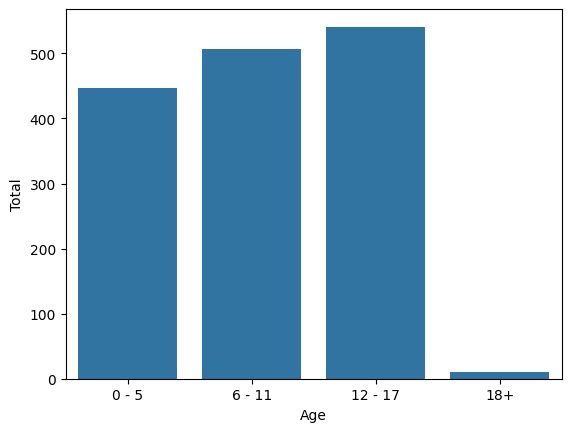

In [18]:
# Lets display some graphs using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# display the number of cases (total) per age group (key column)
sns.barplot(x='key', y='total', data=df)

# set the labels
plt.ylabel('Total')
plt.xlabel('Age') 



<Axes: xlabel='key', ylabel='male'>

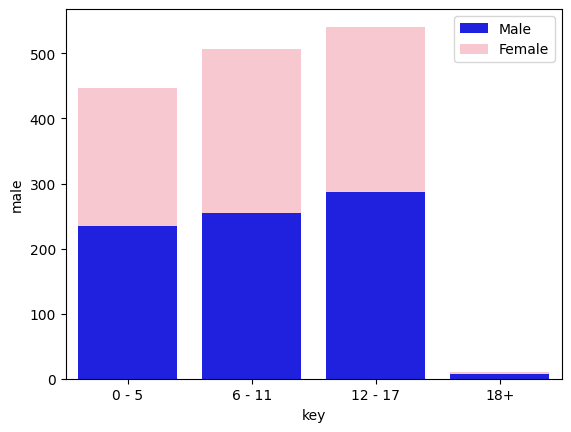

In [21]:
# dissagregate the number of cases per sex
# We have the count of on male column and female cases on female column, the key label is the age group

sns.barplot(x='key', y='male', data=df, color='blue', label='Male')
sns.barplot(x='key', y='female', data=df, color='pink', label='Female', bottom=df['male']) 



In [34]:
# Now let's do the same but with the cases raw data

cases = primero.get_cases()
# this call returns already a pandas dataframe
cases

,enabled,age,sex,status,flagged,owned_by,workflow,estimated,has_photo,module_id,...,consent_reporting,interview_subject,case_plan_approved,assessment_approved,assessment_due_date,case_status_reopened,consent_for_services,disclosure_other_orgs,withholding_info_reason,service_implemented_day_times
0,True,17,male,open,False,primero_cp_ar,new,False,False,primeromodule-cp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,True,11,female,open,False,primero_cp_ar,new,False,False,primeromodule-cp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,True,2,male,open,False,primero_cp_ar,new,NaN,False,primeromodule-cp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,True,7,female,open,False,primero_cp_ar,new,False,False,primeromodule-cp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,True,14,male,open,False,primero_cp_ar,new,False,False,primeromodule-cp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499,True,5,female,open,False,primero_cp_ar,new,NaN,False,primeromodule-cp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1500,True,1,female,open,False,primero,care_plan,False,False,primeromodule-cp,...,true,individual,False,False,2024-10-31,False,True,True,[fear],[]
1501,True,9,male,open,False,primero,new,True,False,primeromodule-cp,...,NaN,NaN,False,False,2024-09-03,False,False,False,NaN,NaN
1502,True,14,male,open,True,primero,new,False,False,primeromodule-cp,...,true,individual,False,False,0004-10-21,False,True,True,[fear],NaN


<Axes: xlabel='age', ylabel='count'>

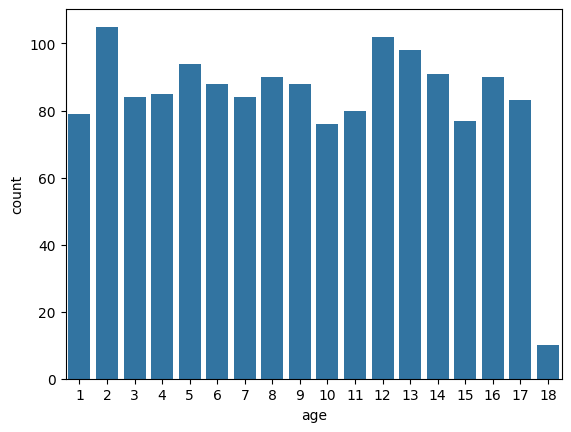

In [23]:
# Group the cases by age and plot the number of cases per age group
sns.countplot(x='age', data=cases)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


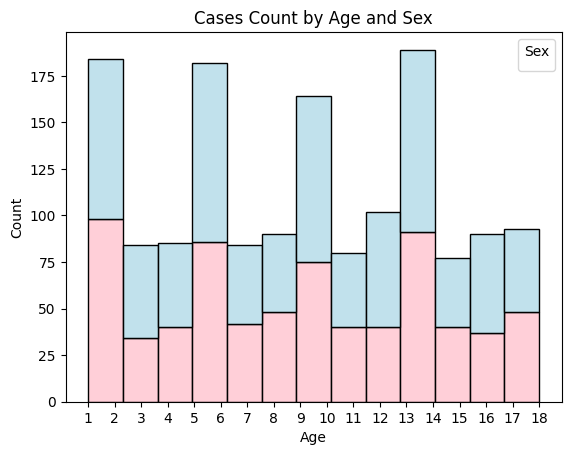

In [33]:
# Display the cases dataframe with age on the x-axis and count on the y-axis, disaggregated by the sex column
sns.histplot(data=cases, x='age', hue='sex', multiple='stack', palette={'male': 'lightblue', 'female': 'pink'})

# set the x to display the age number 
plt.xticks(range(1, 19, 1))
# Set the labels
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Cases Count by Age and Sex')
plt.legend(title='Sex')

plt.show()